In [ ]:
# install dependencies
!pip install pandas sklearn numerapi

In [ ]:
# import dependencies
import pandas as pd
import numpy as np
import numerapi
import sklearn.linear_model
import matplotlib.pylab as plt

In [ ]:
### CHANGE FOR https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_datasets.zip

In [ ]:
! wget https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_datasets.zip

--2020-11-09 18:14:25--  https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_datasets.zip
Resolving numerai-public-datasets.s3-us-west-2.amazonaws.com (numerai-public-datasets.s3-us-west-2.amazonaws.com)... 52.218.197.33
Connecting to numerai-public-datasets.s3-us-west-2.amazonaws.com (numerai-public-datasets.s3-us-west-2.amazonaws.com)|52.218.197.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397008335 (379M) [binary/octet-stream]
Saving to: ‘latest_numerai_datasets.zip’

latest_numerai_data 100%[===================>] 378.62M  18.6MB/s    in 22s     

2020-11-09 18:14:48 (17.3 MB/s) - ‘latest_numerai_datasets.zip’ saved [397008335/397008335]



In [ ]:
! unzip latest_numerai_datasets.zip

Archive:  latest_numerai_datasets.zip
  inflating: numerai_training_data.csv  
  inflating: numerai_tournament_data.csv  
  inflating: example_predictions_target_kazutsugi.csv  
  inflating: example_model.py        
  inflating: example_model.r         
  inflating: numerox_example.py      
  inflating: analysis_and_tips.ipynb  


In [ ]:
! ls

analysis_and_tips.ipynb			  numerai_tournament_data.csv
example_model.py			  numerai_training_data.csv
example_model.r				  numerox_example.py
example_predictions_target_kazutsugi.csv  sample_data
latest_numerai_datasets.zip


In [ ]:
class DataLoader:

    def __init__(self, 
                 train_path = "numerai_training_data.csv", 
                 tournament_path = "numerai_tournament_data.csv"):
      
        # download the latest training dataset (takes around 30s)
        self.training_data = pd.read_csv(train_path)
        # download the latest tournament dataset (takes around 30s)
        self.tournament_data = pd.read_csv(tournament_path)
        
    def get_dataset(self):

        # find only the feature columns
        feature_cols = self.training_data.columns[self.training_data.columns.str.startswith('feature')]
        # X, Y, eras
        training_features, live_features = self.training_data[feature_cols], self.tournament_data[feature_cols]
        eras_train, eras_tournament = self.training_data.era, self.tournament_data.era
        target_train, target_tournament = self.training_data.target_kazutsugi, self.tournament_data.target_kazutsugi

        return training_features, live_features, target_train, target_tournament, eras_train, eras_tournament

    def get_validation_ids(self):
        return self.tournament_data.data_type=='validation'

    def get_tournament_ids(self):
        return self.tournament_data["id"]

# Loading Data

In [ ]:
loader = DataLoader()

In [ ]:
training_features, live_features, target_train, target_tournament, eras_train, eras_tournament = loader.get_dataset()

In [ ]:
validation_ids = loader.get_validation_ids()
tournament_data_id = loader.get_tournament_ids()

In [ ]:
del loader

# Feature Selection

In [ ]:
IMPORTANT_FEATURES = ['feature_intelligence1',
 'feature_intelligence2',
 'feature_intelligence3',
 'feature_intelligence4',
 'feature_intelligence5',
 'feature_intelligence6',
 'feature_intelligence7',
 'feature_intelligence9',
 'feature_intelligence10',
 'feature_intelligence11',
 'feature_charisma2',
 'feature_charisma3',
 'feature_charisma4',
 'feature_charisma5',
 'feature_charisma7',
 'feature_charisma10',
 'feature_charisma11',
 'feature_charisma13',
 'feature_charisma15',
 'feature_charisma16',
 'feature_charisma17',
 'feature_charisma18',
 'feature_charisma19',
 'feature_charisma20',
 'feature_charisma21',
 'feature_charisma22',
 'feature_charisma23',
 'feature_charisma24',
 'feature_charisma25',
 'feature_charisma26',
 'feature_charisma27',
 'feature_charisma28',
 'feature_charisma29',
 'feature_charisma30',
 'feature_charisma31',
 'feature_charisma32',
 'feature_charisma33',
 'feature_charisma34',
 'feature_charisma36',
 'feature_charisma37',
 'feature_charisma39',
 'feature_charisma40',
 'feature_charisma41',
 'feature_charisma43',
 'feature_charisma44',
 'feature_charisma45',
 'feature_charisma46',
 'feature_charisma47',
 'feature_charisma48',
 'feature_charisma50',
 'feature_charisma51',
 'feature_charisma52',
 'feature_charisma53',
 'feature_charisma54',
 'feature_charisma55',
 'feature_charisma56',
 'feature_charisma58',
 'feature_charisma62',
 'feature_charisma63',
 'feature_charisma64',
 'feature_charisma65',
 'feature_charisma67',
 'feature_charisma68',
 'feature_charisma69',
 'feature_charisma70',
 'feature_charisma71',
 'feature_charisma72',
 'feature_charisma73',
 'feature_charisma74',
 'feature_charisma75',
 'feature_charisma76',
 'feature_charisma77',
 'feature_charisma78',
 'feature_charisma79',
 'feature_charisma80',
 'feature_charisma81',
 'feature_charisma82',
 'feature_charisma83',
 'feature_charisma85',
 'feature_charisma86',
 'feature_strength1',
 'feature_strength2',
 'feature_strength4',
 'feature_strength5',
 'feature_strength6',
 'feature_strength7',
 'feature_strength8',
 'feature_strength10',
 'feature_strength11',
 'feature_strength12',
 'feature_strength14',
 'feature_strength15',
 'feature_strength16',
 'feature_strength17',
 'feature_strength18',
 'feature_strength19',
 'feature_strength20',
 'feature_strength22',
 'feature_strength23',
 'feature_strength24',
 'feature_strength25',
 'feature_strength26',
 'feature_strength27',
 'feature_strength29',
 'feature_strength30',
 'feature_strength31',
 'feature_strength32',
 'feature_strength34',
 'feature_strength35',
 'feature_strength36',
 'feature_strength37',
 'feature_strength38',
 'feature_dexterity1',
 'feature_dexterity2',
 'feature_dexterity4',
 'feature_dexterity5',
 'feature_dexterity6',
 'feature_dexterity7',
 'feature_dexterity9',
 'feature_dexterity10',
 'feature_dexterity12',
 'feature_dexterity13',
 'feature_dexterity14',
 'feature_constitution1',
 'feature_constitution3',
 'feature_constitution5',
 'feature_constitution6',
 'feature_constitution8',
 'feature_constitution9',
 'feature_constitution11',
 'feature_constitution12',
 'feature_constitution13',
 'feature_constitution14',
 'feature_constitution15',
 'feature_constitution16',
 'feature_constitution17',
 'feature_constitution18',
 'feature_constitution20',
 'feature_constitution21',
 'feature_constitution24',
 'feature_constitution25',
 'feature_constitution27',
 'feature_constitution28',
 'feature_constitution29',
 'feature_constitution30',
 'feature_constitution33',
 'feature_constitution34',
 'feature_constitution35',
 'feature_constitution37',
 'feature_constitution38',
 'feature_constitution43',
 'feature_constitution44',
 'feature_constitution46',
 'feature_constitution48',
 'feature_constitution49',
 'feature_constitution50',
 'feature_constitution51',
 'feature_constitution53',
 'feature_constitution55',
 'feature_constitution56',
 'feature_constitution57',
 'feature_constitution58',
 'feature_constitution59',
 'feature_constitution60',
 'feature_constitution61',
 'feature_constitution62',
 'feature_constitution63',
 'feature_constitution64',
 'feature_constitution65',
 'feature_constitution66',
 'feature_constitution69',
 'feature_constitution70',
 'feature_constitution72',
 'feature_constitution74',
 'feature_constitution75',
 'feature_constitution77',
 'feature_constitution78',
 'feature_constitution80',
 'feature_constitution81',
 'feature_constitution82',
 'feature_constitution84',
 'feature_constitution85',
 'feature_constitution86',
 'feature_constitution88',
 'feature_constitution89',
 'feature_constitution91',
 'feature_constitution92',
 'feature_constitution94',
 'feature_constitution95',
 'feature_constitution96',
 'feature_constitution97',
 'feature_constitution98',
 'feature_constitution99',
 'feature_constitution100',
 'feature_constitution102',
 'feature_constitution103',
 'feature_constitution104',
 'feature_constitution105',
 'feature_constitution106',
 'feature_constitution107',
 'feature_constitution108',
 'feature_constitution109',
 'feature_constitution110',
 'feature_constitution111',
 'feature_constitution113',
 'feature_constitution114',
 'feature_wisdom1',
 'feature_wisdom2',
 'feature_wisdom4',
 'feature_wisdom5',
 'feature_wisdom7',
 'feature_wisdom8',
 'feature_wisdom9',
 'feature_wisdom10',
 'feature_wisdom11',
 'feature_wisdom12',
 'feature_wisdom14',
 'feature_wisdom16',
 'feature_wisdom17',
 'feature_wisdom18',
 'feature_wisdom19',
 'feature_wisdom20',
 'feature_wisdom21',
 'feature_wisdom22',
 'feature_wisdom23',
 'feature_wisdom24',
 'feature_wisdom25',
 'feature_wisdom28',
 'feature_wisdom29',
 'feature_wisdom30',
 'feature_wisdom31',
 'feature_wisdom32',
 'feature_wisdom33',
 'feature_wisdom34',
 'feature_wisdom35',
 'feature_wisdom36',
 'feature_wisdom38',
 'feature_wisdom39',
 'feature_wisdom41',
 'feature_wisdom42',
 'feature_wisdom43',
 'feature_wisdom44',
 'feature_wisdom45',
 'feature_wisdom46']

In [ ]:
training_features = training_features[IMPORTANT_FEATURES]
live_features = live_features[IMPORTANT_FEATURES]

# Modeling

In [ ]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
class FeatureExtractor:
    
    def __init__(self):
        self.model = None

    def extract(self, X):
        if self.model == None:
            self.model = PCA(0.999)
            return self.model.fit_transform(X)
        else:
            return self.model.transform(X)

In [ ]:
class LabelProcessor:

    def __init__(self):
        self.model = None

    def process(self, X):
        if self.model == None:
            self.model = preprocessing.LabelEncoder()
            return self.model.fit_transform(X)
        else:
            return self.model.transform(X)   

In [ ]:
class RidgeClassifierModel:

    def __init__(self, cw = {
                              0: 1,
                              1: 1.1, 
                              2: 1,
                              3: 1.1,
                              4: 0.999
                          }, alpha = 10, references = [0.0, 0.25, 0.5, 0.75, 1.0]
                 ):

        self.cw = cw
        self.alpha = alpha
        self.references = references
        self.model = sklearn.linear_model.RidgeClassifier(class_weight = self.cw, alpha = self.alpha)
    
    def fit(self, X, Y):
        self.model.fit(X, Y)

    def predict(self, X):
        return self.model.predict(X)

    def predict_softmax(self, X, temperature = 1.0):
        d = self.model.decision_function(X)
        predictions_proba = np.array([np.exp(di / temperature) / np.sum(np.exp(di / temperature)) for di in d])
        single_score_predictions = np.array(
                [
                    sum(self.references[i] * x[i] for i in range(len(self.references))) for x in predictions_proba
                ]
            )
        return single_score_predictions

In [ ]:
fe = FeatureExtractor()
training_features_pca = fe.extract(training_features)
live_features_pca = fe.extract(live_features)

In [ ]:
le = LabelProcessor()
target_train_c = le.process(target_train)

In [ ]:
model = RidgeClassifierModel()
model.fit(training_features_pca, target_train_c)
predictions = model.predict(training_features_pca)
predictions_single = model.predict_softmax(training_features_pca)

In [ ]:
print(classification_report(target_train_c, predictions))

              precision    recall  f1-score   support

           0       0.27      0.30      0.28    100042
           1       0.23      0.23      0.23    100046
           2       0.29      0.24      0.26    101632
           3       0.23      0.23      0.23    100041
           4       0.28      0.31      0.29    100047

    accuracy                           0.26    501808
   macro avg       0.26      0.26      0.26    501808
weighted avg       0.26      0.26      0.26    501808



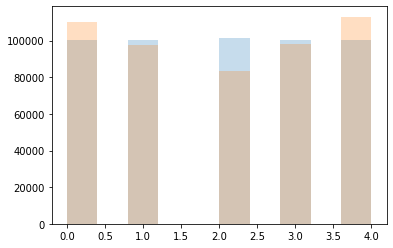

In [ ]:
plt.figure()
plt.hist(target_train_c, alpha = 0.25)
plt.hist(predictions, alpha = 0.25)
plt.show()

In [ ]:
class Scorer:

    def __init__(self, eras):
        self.eras = eras

    # The models should be scored based on the rank-correlation (spearman) with the target
    def numerai_score(self, y_true, y_pred):
        rank_pred = y_pred.groupby(self.eras).apply(lambda x: x.rank(pct=True, method="first"))
        return np.corrcoef(y_true, rank_pred)[0,1]

    # It can also be convenient while working to evaluate based on the regular (pearson) correlation
    def correlation_score(self, y_true, y_pred):
        return np.corrcoef(y_true, y_pred)[0,1]

    def sharpe_score(self, y_true, y_pred):
        df2 = pd.DataFrame(
            {
                "era": self.eras,
                "preds": y_pred,
                "target": y_true
            }
        )
        scores_per_era = df2.groupby("era").apply(lambda d: np.corrcoef(d["preds"], d["target"])[0,1])
        return scores_per_era.mean(), scores_per_era.std(), scores_per_era.mean() / scores_per_era.std()

In [ ]:
scorer = Scorer(eras_train)
print(scorer.numerai_score(target_train, pd.Series(predictions_single)))
print(scorer.correlation_score(target_train, pd.Series(predictions_single)))
print(scorer.sharpe_score(target_train, pd.Series(predictions_single)))

0.05313778333306397
0.05399732351597411
(0.05534367276904025, 0.03713095937139626, 1.4904994028157028)


# Live Prediction

In [ ]:
predictions_live = model.predict(live_features_pca)
predictions_single_live = model.predict_softmax(live_features_pca, temperature = 1.0)

In [ ]:
print(classification_report(le.process(
    target_tournament[validation_ids]), 
    predictions_live[validation_ids])
)

              precision    recall  f1-score   support

           0       0.27      0.29      0.28     21352
           1       0.23      0.22      0.22     21363
           2       0.29      0.24      0.26     21474
           3       0.22      0.22      0.22     21362
           4       0.27      0.31      0.29     21344

    accuracy                           0.26    106895
   macro avg       0.26      0.26      0.26    106895
weighted avg       0.26      0.26      0.26    106895



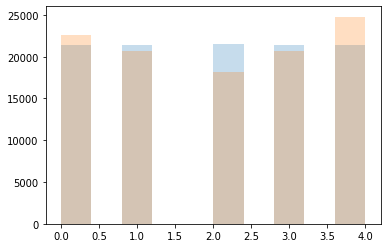

In [ ]:
plt.figure()
plt.hist(le.process(target_tournament[validation_ids]), alpha = 0.25)
plt.hist(predictions_live[validation_ids], alpha = 0.25)
plt.show()

In [ ]:
scorer = Scorer(eras_tournament[validation_ids])
print(scorer.numerai_score(target_tournament[validation_ids], pd.Series(predictions_single_live)[validation_ids]))
print(scorer.correlation_score(target_tournament[validation_ids], pd.Series(predictions_single_live)[validation_ids]))
print(scorer.sharpe_score(target_tournament[validation_ids], pd.Series(predictions_single_live)[validation_ids]))

0.016476323636429986
0.016123436239599317
(0.016930760917250536, 0.03489698127201992, 0.48516405431393184)


# Making submission

In [ ]:
# predictions must have an `id` column and a `prediction_kazutsugi` column
predictions_df = tournament_data_id.to_frame()
predictions_df["prediction_kazutsugi"] = predictions_single_live
predictions_df.head()

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.489449
1,n000920ed083903f,0.495210
2,n0038e640522c4a6,0.523504
3,n004ac94a87dc54b,0.496724
4,n0052fe97ea0c05f,0.499568


In [ ]:
# Get your API keys from https://numer.ai/submit
public_id = "O3QGN6P6PP5WOUM4FEPDP35D4Q7XSDI4"
secret_key = "PAEPK26X3K6AU7NERIW5PEOK53SZ3VB55LE4FG5S3Z6WTTLYIRQXMXCTRZOX4PRX"
napi = numerapi.NumerAPI(public_id=public_id, secret_key=secret_key)

In [ ]:
# Upload your predictions
predictions_df.to_csv("predictions.csv", index=False)
submission_id = napi.upload_predictions("predictions.csv")

2020-11-09 18:17:19,345 INFO numerapi.base_api: uploading predictions...


In [ ]:
submission_id

'83ec66f4-6f1a-426a-828f-e52990892911'